In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from scipy.constants import h

sp.init_printing()

x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
hbar = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, hbar, n, psi(x)

In [16]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol = sol.subs(k, n * sp.pi / a)
sol

In [17]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

Aby sprawdzić przestrzeganie zasady nieoznaczoności Heisenberga w przypadku studni potencjału, musimy dokonać obliczeń wartości średnich i wariancji dla operatorów pędu i położenia w kontekście danej funkcji falowej. Następnie, wykorzystując nierówność Heisenberga, jesteśmy w stanie ocenić, czy wspomniana zasada jest zachowana.

W celu ustalenia odchylenia standardowego konieczne jest wyznaczenie wartości średniej operatora położenia i wartości średniej jego kwadratu. Posiadając te dane, możemy obliczyć wariancję, a jej pierwiastkowanie pozwoli nam uzyskać poszukiwane odchylenie standardowe.

In [18]:
wartoscOczekiwanaX = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
wartoscOczekiwanaX

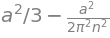

In [19]:
wartoscOczekiwanaX2 = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
wartoscOczekiwanaX2

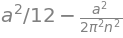

In [20]:
wariancjaX = wartoscOczekiwanaX2 - wartoscOczekiwanaX**2
wariancjaX

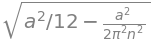

In [21]:
dewiacjaX = sp.sqrt(wariancjaX)
dewiacjaX

Analogicznie dla operatora pędu.

In [22]:
wartoscOczekiwanaP = sp.integrate(sol.rhs * (-hbar*sp.I) * sol.rhs.diff(x), (x, 0, a)).simplify()
wartoscOczekiwanaP

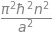

In [23]:
wartoscOczekiwanaP2 = sp.integrate(sol.rhs * (sol.rhs).diff(x,x) * (-hbar**2), (x, 0, a)).simplify()
wartoscOczekiwanaP2

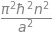

In [24]:
wariancjaP = wartoscOczekiwanaP2 - wartoscOczekiwanaP**2
wariancjaP

In [25]:
dewiacjaP = sp.sqrt(wariancjaP)
dewiacjaP

Aby weryfikować zgodność z nierównością Heisenberga, musimy zbadać, czy produkt odchyleń standardowych dla operatorów położenia i pędu przekracza lub jest równy połowie zredukowanej stałej Plancka.

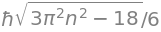

In [26]:
wzor=dewiacjaX*dewiacjaP
wzor.simplify()

Sprawdzamy czy zasada nieoznaczoności jest spełniona dla najmniejszego n=1:

In [27]:
lewa = h*sp.sqrt(3*sp.pi**2-18)/6
prawa = h/2
prawa
lewa.evalf()
if(lewa.evalf()>prawa):
    print("Zasada nieoznaczoności jest spełniona")
else:
    print("Zasada nieoznaczoności nie jest spełniona")

Zasada nieoznaczoności jest spełniona
